In [1]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../corona_2019.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic'], dtype=object)

In [5]:
df = df.groupby(['ObservationDate','Country/Region']).agg({'Confirmed':'sum'}).reset_index()

In [6]:
df.head()

,ObservationDate,Country/Region,Confirmed
0,01/22/2020,Hong Kong,0.0
1,01/22/2020,Japan,2.0
2,01/22/2020,Macau,1.0
3,01/22/2020,Mainland China,547.0
4,01/22/2020,South Korea,1.0


In [7]:
df.columns

Index(['ObservationDate', 'Country/Region', 'Confirmed'], dtype='object')

In [8]:
china = df[(df['Country/Region']=='Mainland China') & (df['Confirmed']>9)]['Confirmed'].reset_index(drop=True).to_frame()

In [9]:
italy = df[(df['Country/Region']=='Italy') & (df['Confirmed']>9)]['Confirmed'].reset_index(drop=True).to_frame()

In [10]:
germany = df[(df['Country/Region']=='Germany') & (df['Confirmed']>9)]['Confirmed'].reset_index(drop=True).to_frame()

In [11]:
south_korea = df[(df['Country/Region']=='South Korea') & (df['Confirmed']>9)]['Confirmed'].reset_index(drop=True).to_frame()

In [12]:
china_norm = china['Confirmed'].iloc[0]
korea_norm = south_korea['Confirmed'].iloc[0]
italy_norm = italy['Confirmed'].iloc[0]
germany_norm = germany['Confirmed'].iloc[0]
china['Confirmed'] = china['Confirmed']/china_norm
south_korea['Confirmed'] = south_korea['Confirmed']/korea_norm
italy['Confirmed'] = italy['Confirmed']/italy_norm
germany['Confirmed'] = germany['Confirmed']/germany_norm

In [13]:
double_two_days = [(2**(i/2)) for i in range(40)]

In [14]:
double_five_days = [(2**(i/5)) for i in range(40)]

In [15]:
double_ten_days = [(2**(i/10)) for i in range(40)]

In [16]:
double_index = np.arange(0,40)

In [17]:
china_trace = go.Scatter(
    x = china.index,
    y = china.Confirmed,
    mode='lines+markers',
    name='China: Normalised (x{})'.format(str(int(china_norm)))
)

In [18]:
south_korea_trace = go.Scatter(
    x = south_korea.index,
    y = south_korea.Confirmed,
    mode='lines+markers',
    name='South Korea: Normalised (x{})'.format(str(int(korea_norm)))
)

In [19]:
italy_trace = go.Scatter(
    x = italy.index,
    y = italy.Confirmed,
    mode='lines+markers',
    name='Italy: Normalised (x{})'.format(str(int(italy_norm)))
)

In [20]:
germany_trace = go.Scatter(
    x = germany.index,
    y = germany.Confirmed,
    mode='lines+markers',
    name='Germany: Normalised (x{})'.format(str(int(germany_norm)))
)

In [21]:
double_two_trace = go.Scatter(
    x = double_index,
    y = double_two_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 2 days',
    showlegend=False
)

In [22]:
double_five_trace = go.Scatter(
    x = double_index,
    y = double_five_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 5 days',
    showlegend=False
)

In [23]:
double_ten_trace = go.Scatter(
    x = double_index,
    y = double_ten_days,
    mode='lines',
    line=dict(color='#A6A6A6', width=1),
    name='Double Every 10 days',
    showlegend=False
)

In [24]:
traces = [china_trace, south_korea_trace, italy_trace, germany_trace, double_two_trace, double_five_trace, double_ten_trace ]

In [28]:
layout = go.Layout(
    height=600,
    width= 1200,
    xaxis=dict(
        title='Days',
        range=[0,40],
        showline=True,
        showgrid=True,
        showticklabels=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    yaxis=dict(
        title='Confirmed Count',
        type="log",
        range=[0,5],
        showgrid=True,
        zeroline=True,
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='gray'
    ),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=35,
            y=5,
            text='Double Every 2 Days',
            showarrow=False,
        ),
        dict(
            x=39,
            y=2.4,
            text='Double Every 5 Days',
            showarrow=False,
        ),
        dict(
            x=39,
            y=1,
            text='Double Every 10 Days',
            showarrow=False,
        )
    ]
    
)

In [29]:
fig = go.Figure(data=traces, layout =layout)

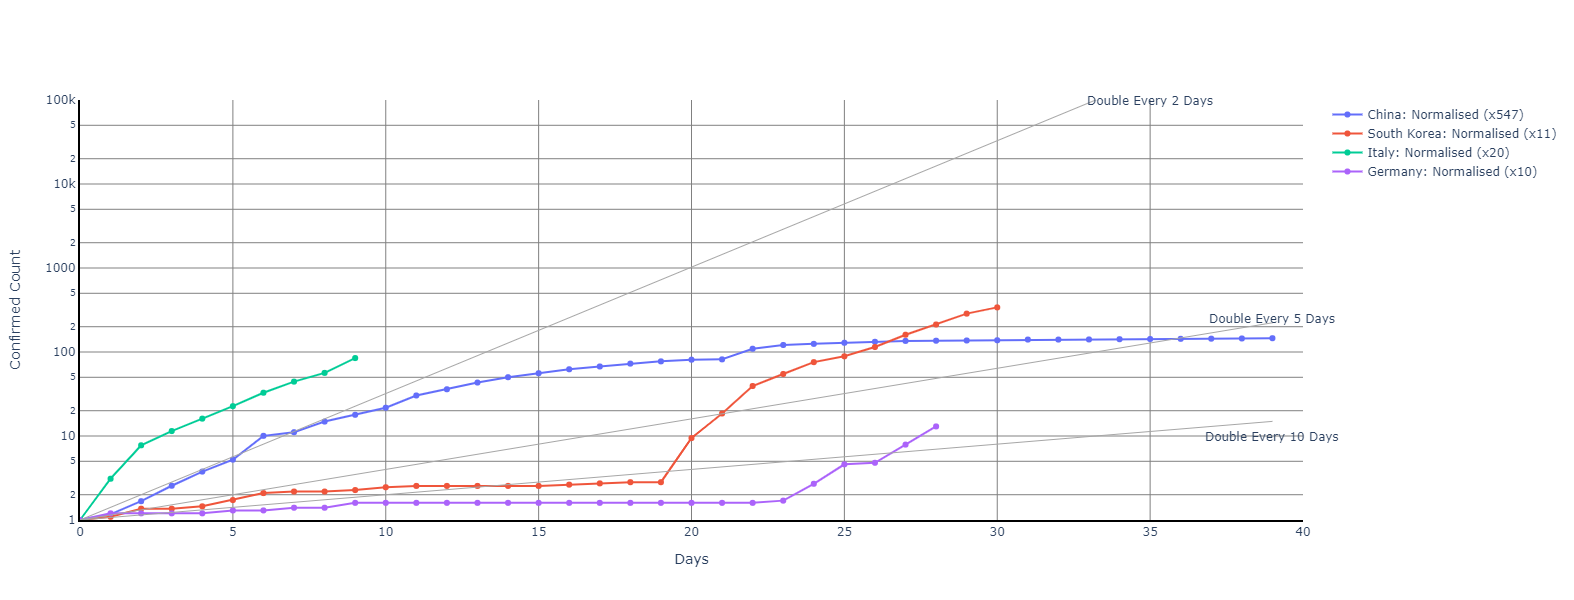

In [30]:
iplot(fig)